In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import os

# This notebook checks that GPT maintains the particle ID number
---

# Make an input dist with two particles and assign id = [25, 75]:

In [2]:
from pmd_beamphysics import single_particle
pg = single_particle(x=-0.001, pz=10000) + single_particle(x=+0.001, pz=10000)
pg.assign_id()
pg.id = np.array([25, 75])
print(pg)

ParticleGroup with 2 particles with total charge 2 C


In [3]:
from gpt import GPT
from gpt.template import basic_template

G = GPT(input_file=basic_template(), initial_particles=pg)
G.run()

particle id = 25, mean x pos = -0.001
particle id = 75, mean x pos = 0.001


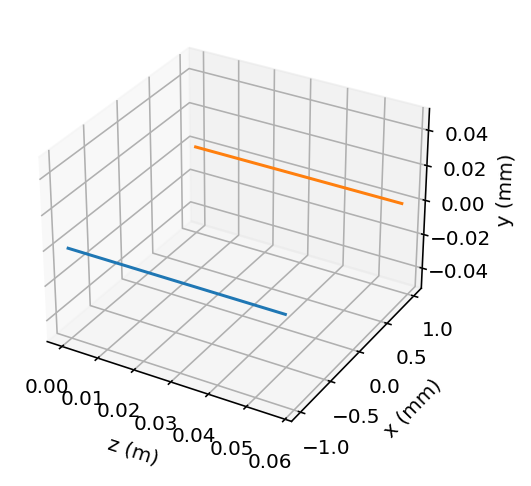

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for ID in pg.id:
    
    tid = G.trajectory(ID, data_type='tout')
    if(tid):
        ax.plot(tid['x']*1000, tid['y']*1000, tid['z'], zdir='x')
        print(f'particle id = {ID},', f'mean x pos = {tid["x"].mean()}')

ax.set_xlabel('z (m)');
ax.set_ylabel('x (mm)');
ax.set_zlabel('y (mm)');

In [5]:
for tout in G.tout:
    print(tout['id'])

[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]
[25. 75.]


In [6]:
os.system('rm -rf gpt.temp.in');